In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import torch 

In [3]:
import os
import sys

In [4]:
%env CUDA_VISIBLE_DEVICES=2

env: CUDA_VISBLE_DEVICES=2


In [4]:
sys.path.append(os.path.normpath(os.path.join(os.getcwd(), '..')))

In [5]:
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog
from src.objects.features import GeneralizedRCNNObjectDetector
import matplotlib.pyplot as plt

In [6]:
cfg = get_cfg()
# add project-specific config (e.g., TensorMask) here if you're not running a model in detectron2's core library
cfg.merge_from_file(model_zoo.get_config_file("COCO-Detection/faster_rcnn_R_101_FPN_3x.yaml"))
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.4  # set threshold for this model
# Find a model from detectron2's model zoo. You can use the https://dl.fbaipublicfiles... url as well
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-Detection/faster_rcnn_R_101_FPN_3x.yaml")
cfg.MODEL.DEVICE = "cpu"

predictor = DefaultPredictor(cfg)
# outputs = predictor(im)

In [7]:
detector = GeneralizedRCNNObjectDetector(cfg)

In [8]:
from src.datasets.apollo_scape import ApolloScape
from src.datasets.hr_wsi import HRWSI
from src.datasets.red_web import RedWeb

In [21]:
dataset = iter(HRWSI())


img1, disp = next(dataset)
img2, _ = next(dataset)

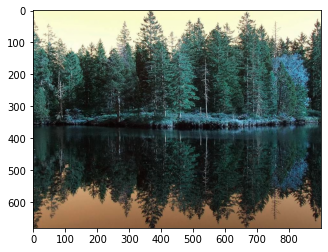

In [10]:
plt.imshow(img1)

In [11]:
cfg.INPUT.FORMAT

'BGR'

In [22]:
img1 = img1[:, :, ::-1].copy().transpose(2,0,1)

In [15]:
from PIL import Image

In [24]:
import pdb
def f():
    
    pdb.set_trace()
    Image.fromarray(img1)

In [ ]:
f()

> /tmp/ipykernel_40398/4080773672.py(5)f()
      1 import pdb
      2 def f():
      3 
      4     pdb.set_trace()
----> 5     Image.fromarray(img1)

ipdb> s
--Call--
> /runai-ivrl-scratch/students/2021-fall-sp-jellouli/anaconda3/envs/jellouli-env/lib/python3.9/site-packages/PIL/Image.py(2799)fromarray()
   2797 
   2798 
-> 2799 def fromarray(obj, mode=None):
   2800     """
   2801     Creates an image memory from an object exporting the array interface

ipdb> n
> /runai-ivrl-scratch/students/2021-fall-sp-jellouli/anaconda3/envs/jellouli-env/lib/python3.9/site-packages/PIL/Image.py(2825)fromarray()
   2823     .. versionadded:: 1.1.6
   2824     """
-> 2825     arr = obj.__array_interface__
   2826     shape = arr["shape"]
   2827     ndim = len(shape)

ipdb> n
> /runai-ivrl-scratch/students/2021-fall-sp-jellouli/anaconda3/envs/jellouli-env/lib/python3.9/site-packages/PIL/Image.py(2826)fromarray()
   2824     """
   2825     arr = obj.__array_interface__
-> 2826     shape = arr["sha

ipdb> p _fromarray_typemap
{((1, 1), '|b1'): ('1', '1;8'), ((1, 1), '|u1'): ('L', 'L'), ((1, 1), '|i1'): ('I', 'I;8'), ((1, 1), '<u2'): ('I', 'I;16'), ((1, 1), '>u2'): ('I', 'I;16B'), ((1, 1), '<i2'): ('I', 'I;16S'), ((1, 1), '>i2'): ('I', 'I;16BS'), ((1, 1), '<u4'): ('I', 'I;32'), ((1, 1), '>u4'): ('I', 'I;32B'), ((1, 1), '<i4'): ('I', 'I'), ((1, 1), '>i4'): ('I', 'I;32BS'), ((1, 1), '<f4'): ('F', 'F'), ((1, 1), '>f4'): ('F', 'F;32BF'), ((1, 1), '<f8'): ('F', 'F;64F'), ((1, 1), '>f8'): ('F', 'F;64BF'), ((1, 1, 2), '|u1'): ('LA', 'LA'), ((1, 1, 3), '|u1'): ('RGB', 'RGB'), ((1, 1, 4), '|u1'): ('RGBA', 'RGBA')}


In [23]:
features, indices, classes, masks = detector.get_object_features([img1], outputs=['features', "classes", "masks"])

TypeError: Cannot handle this data type: (1, 1, 900), |u1

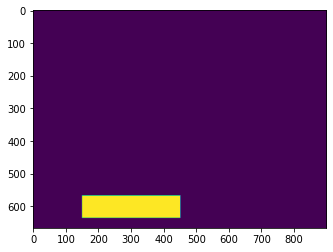

In [14]:
plt.imshow(masks[0][0])

In [17]:
output = predictor(img1[:, :, ::-1])

In [18]:
output

{'instances': Instances(num_instances=1, image_height=667, image_width=900, fields=[pred_boxes: Boxes(tensor([[125.5789, 472.9547, 376.5856, 530.9124]])), scores: tensor([0.9708]), pred_classes: tensor([13])])}

In [88]:
# We can use `Visualizer` to draw the predictions on the image.
v = Visualizer(img2[:, :, ::1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1)
out = v.draw_instance_predictions(output["instances"].to("cpu"))

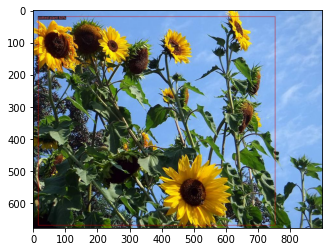

In [89]:
plt.imshow(out.get_image())

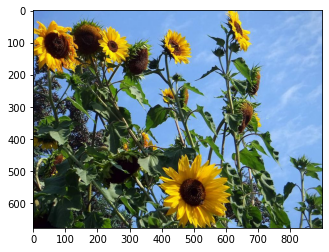

In [67]:
plt.imshow(img2)

In [66]:
img2.shape

(677, 900, 3)

In [64]:
masks[1].shape

torch.Size([1, 677, 900])

In [53]:
features

tensor([[0.0000, 0.0697, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        ...,
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.0000, 0.2448, 0.0000,  ..., 0.6605, 0.0000, 0.0000]])

In [54]:
indices

[10, 1]

In [55]:
classes

[tensor([58, 58, 58, 58, 58, 75, 58,  0, 58, 58]), tensor([58])]

In [9]:
# We can use `Visualizer` to draw the predictions on the image.
v = Visualizer(img[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
out = v.draw_instance_predictions(output["instances"].to("cpu"))

In [10]:
import matplotlib.pyplot as plt

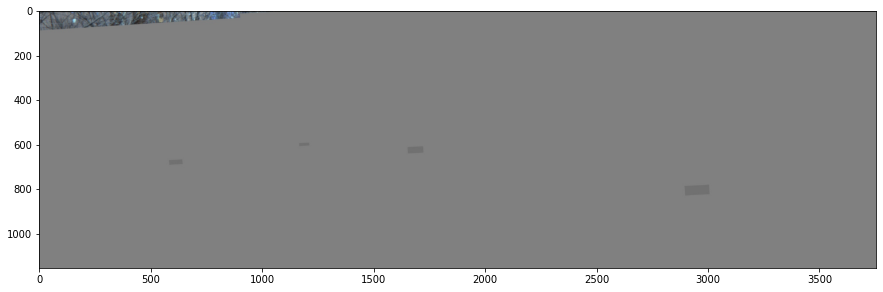

In [11]:
plt.figure(figsize=(15,15))
plt.imshow(out.get_image())

In [12]:
dataset = HRWSI(remote=True, username="jellouli")

Remote server password: ········


In [ ]:
img, disp = next(iter(dataset))

In [ ]:
output = predictor(img)

In [62]:
# We can use `Visualizer` to draw the predictions on the image.
v = Visualizer(img[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
out = v.draw_instance_predictions(output["instances"].to("cpu"))

In [63]:
import matplotlib.pyplot as plt

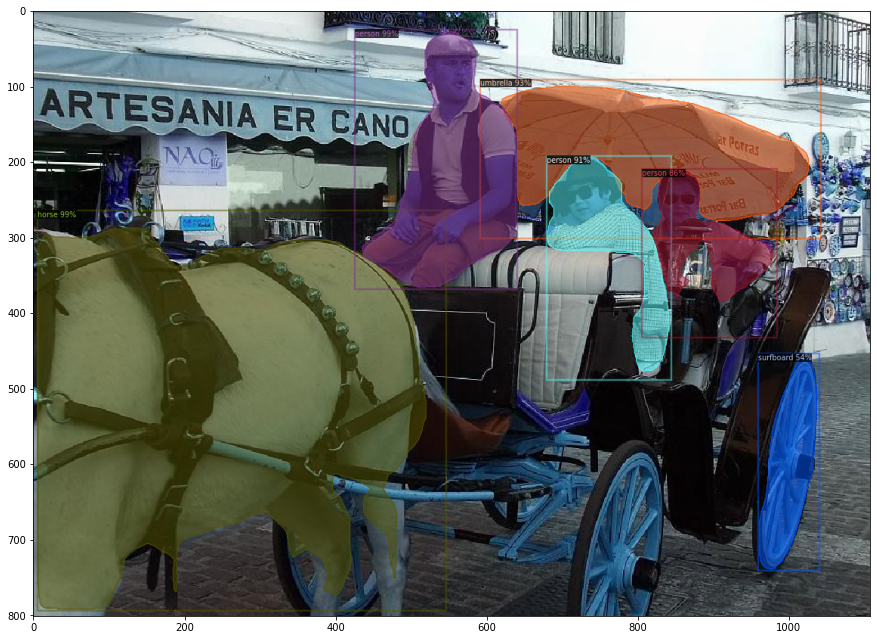

In [64]:
plt.figure(figsize=(15,15))
plt.imshow(out.get_image())

In [ ]:
dataset = RedWeb(remote=True, username="jellouli")

In [ ]:
img, disp = next(iter(dataset))

In [ ]:
output = predictor(img)

In [ ]:
# We can use `Visualizer` to draw the predictions on the image.
v = Visualizer(img[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
out = v.draw_instance_predictions(output["instances"].to("cpu"))

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
plt.figure(figsize=(15,15))
plt.imshow(out.get_image())